
<div style="display: flex; align-items: center; justify-content: center; padding: 20px 0; text-align: center; height: 100vh; max-width: 1500px; margin: auto;">
    <img src="https://media.licdn.com/dms/image/v2/D4D3DAQFGx0XnuUvugA/image-scale_191_1128/image-scale_191_1128/0/1662458005755/nova_ims_information_management_school_cover?e=2147483647&v=beta&t=J3Q4LlZi36_4UAFhj2019QdtfXLn0kQwaX25jgaBhOQ" 
         alt="Logo" 
         style="width: 100%; max-width: 1500px; height: auto; max-height: 200px; object-fit: cover; object-position: center; border: 5px solid #A0C020; border-radius: 5px;">
</div>

<div style="text-align: center; padding: 20px 0;">
    <h5>This analysis is conducted as part of the <b><i>Text Mining</i></b> course, a component of the Master's program in Data Science and Advanced Analytics at the <b><u>Nova Information Management School</u></b>.</h5>
</div>
<!-- This notebook template was created by Catarina Gonçalves Nunes, 20230083 -->
<div style="text-align: center; color: #A0C020;">
    <h1><b>Predicting market behavior from tweets</b></h1>
</div>


<h3 style="text-align: center;"><u></b>Group 31</u></b></h3>

|     Student Name     |     Student ID     | 
|         ---          |           ---          |
|     David|         | 
|     Elcano           |              |
|     Jorge Cordeiro      |       20240594       |
|     Rui   |            |

# 1 - Importing libraries

In [1]:
# Basic imports
import pandas as pd
import matplotlib.pyplot as plt

# Custom modules
from preprocessing_functions import *  # This includes the 'clean' function
from exporting_and_analysing_processed_data import *  # This includes analyze_preprocessed_data and export_processed_data
from sklearn.model_selection import train_test_split

# 2 -  Preprocessing

In [3]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [5]:
train_preprocessing = train_df.copy()
test = test_df.copy()

## 2.1 - Changing the data type

### Changing the label

In [7]:
train_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9543 non-null   object
 1   label   9543 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 149.2+ KB


In [9]:
train_preprocessing['label'] = train_preprocessing['label'].astype('int8')

In [11]:
train_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9543 non-null   object
 1   label   9543 non-null   int8  
dtypes: int8(1), object(1)
memory usage: 84.0+ KB


## 2.2 - Splitting the train into train and val

In [13]:

train, val = train_test_split(train_preprocessing,test_size=0.15,random_state=42,stratify=train_preprocessing['label'])

In [15]:
def class_distribution(df, name):
    print(f"\n{name} class distribution:")
    print(df['label'].value_counts(normalize=True).sort_index())

class_distribution(train, "Train")
class_distribution(val, "Val")




Train class distribution:
label
0    0.151153
1    0.201455
2    0.647392
Name: proportion, dtype: float64

Val class distribution:
label
0    0.150838
1    0.201816
2    0.647346
Name: proportion, dtype: float64


## 2.3 - different versions of the preprocessed training data

In [33]:
# Each version will use a different combination of tokenizer + lemmatization/stemming

In [17]:

# Initialize empty dictionaries to store different preprocessing versions
train_processed = {}
val_processed = {}
test_processed = {}

# 1. Word tokenizer with lemmatization
train_processed['word_lemma'] = clean(train['text'], tokenizer_name='word_tokenize',lemmatize=True, stemmer_type=None,remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True, expand_contractions=True)

# Apply the same preprocessing to validation and test data
val_processed['word_lemma'] = clean(val['text'], tokenizer_name='word_tokenize',lemmatize=True, stemmer_type=None,remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True,expand_contractions=True)
test_processed['word_lemma'] = clean(test['text'], tokenizer_name='word_tokenize',lemmatize=True, stemmer_type=None,remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True,expand_contractions=True)
# 2. Tweet tokenizer with Porter stemming
train_processed['tweet_porter'] = clean(train['text'], tokenizer_name='tweet_tokenizer',lemmatize=False, stemmer_type='porter',remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True,expand_contractions=True)

val_processed['tweet_porter'] = clean(val['text'], tokenizer_name='tweet_tokenizer',lemmatize=False, stemmer_type='porter',remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True, expand_contractions=True)
test_processed['tweet_porter'] = clean(test['text'], tokenizer_name='tweet_tokenizer',lemmatize=False, stemmer_type='porter',remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True, expand_contractions=True)
# 3. Whitespace tokenizer with Lancaster stemming
train_processed['whitespace_lancaster'] = clean(train['text'], tokenizer_name='whitespace_tokenizer',lemmatize=False, stemmer_type='lancaster',remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True,expand_contractions=True)

val_processed['whitespace_lancaster'] = clean(val['text'], tokenizer_name='whitespace_tokenizer',lemmatize=False, stemmer_type='lancaster',remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True,expand_contractions=True)
test_processed['whitespace_lancaster'] = clean(test['text'], tokenizer_name='whitespace_tokenizer',lemmatize=False, stemmer_type='lancaster',remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True,expand_contractions=True)
# 4. Regexp tokenizer with Snowball stemming
train_processed['regexp_snowball'] = clean(train['text'], tokenizer_name='regexp_tokenizer',lemmatize=False, stemmer_type='snowball',remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True,expand_contractions=True)

val_processed['regexp_snowball'] = clean(val['text'], tokenizer_name='regexp_tokenizer',lemmatize=False, stemmer_type='snowball',remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True,expand_contractions=True)
test_processed['regexp_snowball'] = clean(test['text'], tokenizer_name='regexp_tokenizer',lemmatize=False, stemmer_type='snowball',remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True,expand_contractions=True)
# 5. Tweet tokenizer with no lemmatization or stemming (just tokenization)
train_processed['tweet_base'] = clean(train['text'], tokenizer_name='tweet_tokenizer',lemmatize=False, stemmer_type=None,remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True,replace_time=True,expand_contractions=True)

val_processed['tweet_base'] = clean(val['text'], tokenizer_name='tweet_tokenizer',lemmatize=False, stemmer_type=None,remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True, replace_time=True, expand_contractions=True)
test_processed['tweet_base'] = clean(test['text'], tokenizer_name='tweet_tokenizer',lemmatize=False, stemmer_type=None,remove_html=True,convert_emoji=True,replace_monetary=True,replace_dates=True, replace_time=True, expand_contractions=True)
# Create DataFrames with the processed text for each version
for version, processed_text in train_processed.items():
    train[f'text_processed_{version}'] = processed_text
    
for version, processed_text in val_processed.items():
    val[f'text_processed_{version}'] = processed_text

for version, processed_text in test_processed.items():
    test[f'text_processed_{version}'] = processed_text

# Print sample results to compare preprocessing strategies
print("Comparison of different preprocessing strategies:\n")

# Select a sample tweet to show differences
sample_idx = 0  # Choose any index from your dataset
original_text = train['text'].iloc[sample_idx]
print(f"Original text: {original_text}\n")

print("Processed versions:")
for version in train_processed.keys():
    processed = train[f'text_processed_{version}'].iloc[sample_idx]
    print(f"{version}: {processed}")
    print("-" * 80)

# Optionally, show a test example too
if len(test) > 0:
    test_sample_idx = 0
    test_original_text = test['text'].iloc[test_sample_idx]
    print(f"\nTest example - Original text: {test_original_text}\n")
    
    print("Processed test versions:")
    for version in test_processed.keys():
        processed = test[f'text_processed_{version}'].iloc[test_sample_idx]
        print(f"{version}: {processed}")
        print("-" * 80)

100%|██████████████████████████████████████████████████████████████████████████████| 2388/2388 [01:19<00:00, 30.14it/s]


Comparison of different preprocessing strategies:

Original text: $BL - BlackLine, Inc. 2019 Q3 - Results - Earnings Call Presentation. Follow this and any other stock on Seeking Al… https://t.co/IGN80h0kEh

Processed versions:
word_lemma: bl blackline inc q result earnings call presentation follow stock seeking al
--------------------------------------------------------------------------------
tweet_porter: bl blacklin inc q result earn call present follow stock seek al
--------------------------------------------------------------------------------
whitespace_lancaster: bl blacklin int q result earn cal pres follow stock seek al
--------------------------------------------------------------------------------
regexp_snowball: bl blacklin inc q result earn call present follow stock seek al
--------------------------------------------------------------------------------
tweet_base: bl blackline inc q results earnings call presentation follow stock seeking al
----------------------------

## 2.4 - quick analysis of the processed data


===== PREPROCESSED DATA ANALYSIS =====


Processed versions missing values:
  word_lemma - Train: 0, Val: 0, Test: 0
  tweet_porter - Train: 0, Val: 0, Test: 0
  whitespace_lancaster - Train: 0, Val: 0, Test: 0
  regexp_snowball - Train: 0, Val: 0, Test: 0
  tweet_base - Train: 0, Val: 0, Test: 0

Generating word clouds...


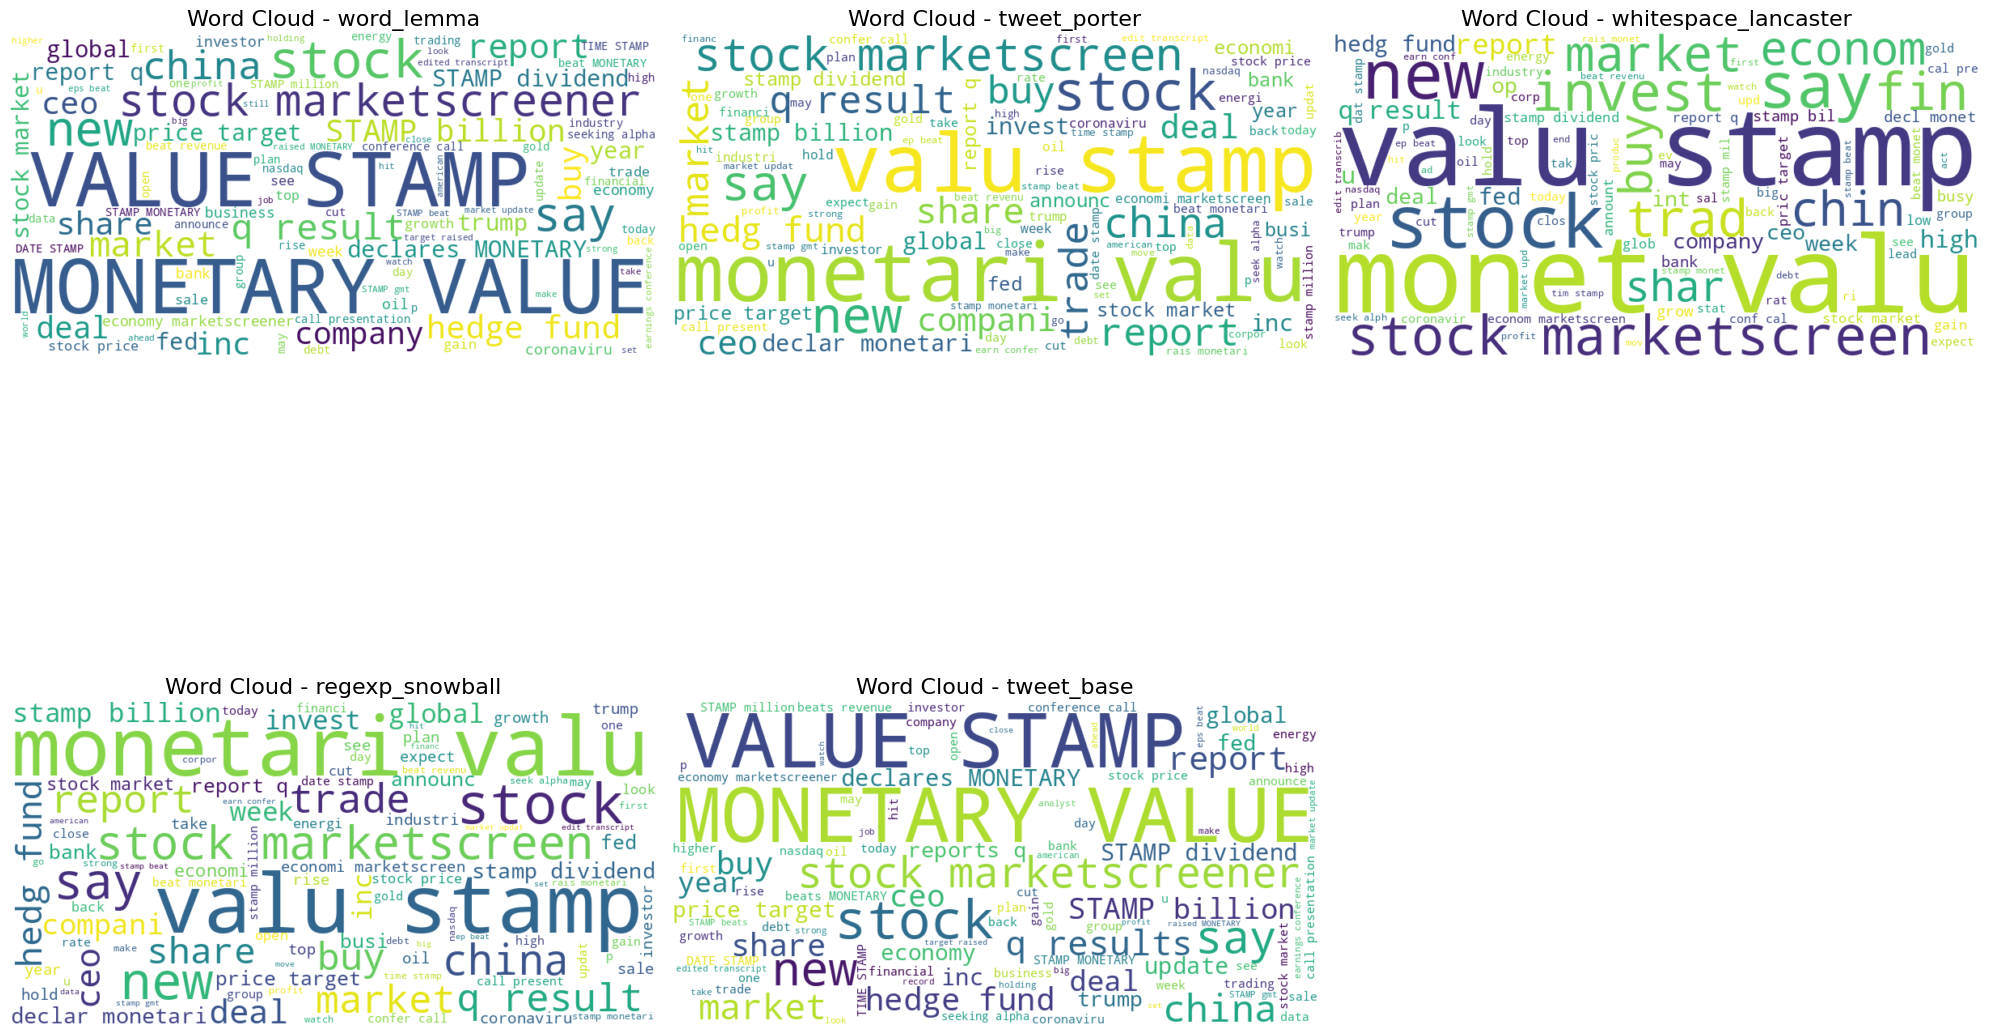


Generating test data word clouds...


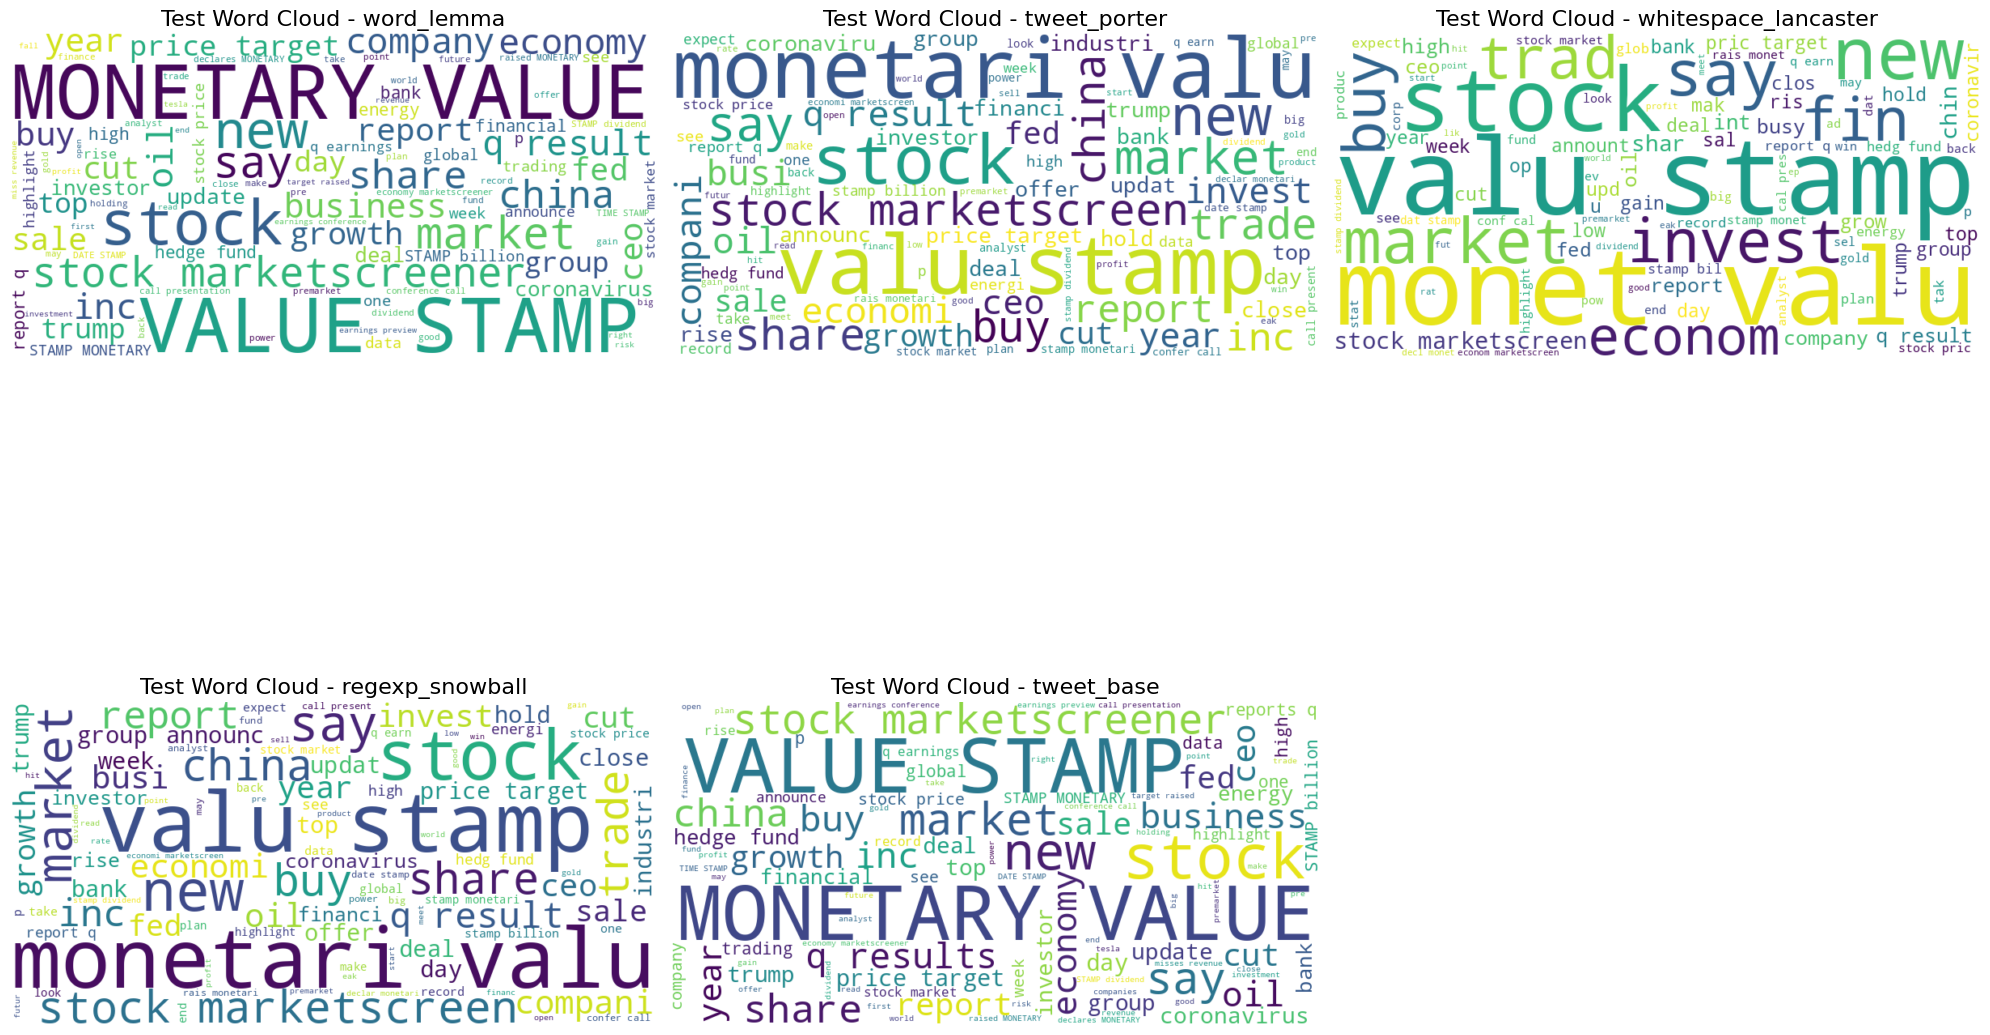


Token count statistics across datasets:
  word_lemma - Average tokens:
    Train: 8.70
    Val: 8.65
    Test: 8.79
  tweet_porter - Average tokens:
    Train: 8.70
    Val: 8.65
    Test: 8.79
  whitespace_lancaster - Average tokens:
    Train: 8.70
    Val: 8.65
    Test: 8.79
  regexp_snowball - Average tokens:
    Train: 8.70
    Val: 8.65
    Test: 8.79
  tweet_base - Average tokens:
    Train: 8.70
    Val: 8.65
    Test: 8.79


In [19]:
analyze_preprocessed_data(train, val, test, list(train_processed.keys()))

## 2.5 exporting the different versions of the processed data

In [21]:
export_processed_data(train, val, test, train_processed, val_processed, test_processed)

Created base directory: processed_data
Created directory: processed_data\word_lemma
Exported word_lemma - Train: processed_data\word_lemma\train.csv, Val: processed_data\word_lemma\val.csv, Test: processed_data\word_lemma\test.csv
Created directory: processed_data\tweet_porter
Exported tweet_porter - Train: processed_data\tweet_porter\train.csv, Val: processed_data\tweet_porter\val.csv, Test: processed_data\tweet_porter\test.csv
Created directory: processed_data\whitespace_lancaster
Exported whitespace_lancaster - Train: processed_data\whitespace_lancaster\train.csv, Val: processed_data\whitespace_lancaster\val.csv, Test: processed_data\whitespace_lancaster\test.csv
Created directory: processed_data\regexp_snowball
Exported regexp_snowball - Train: processed_data\regexp_snowball\train.csv, Val: processed_data\regexp_snowball\val.csv, Test: processed_data\regexp_snowball\test.csv
Created directory: processed_data\tweet_base
Exported tweet_base - Train: processed_data\tweet_base\train.cs